In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
# fetch data
from sklearn.datasets import fetch_openml
df, target = fetch_openml('mnist_784', version=1, return_X_y=True)

In [9]:
df.shape

(70000, 784)

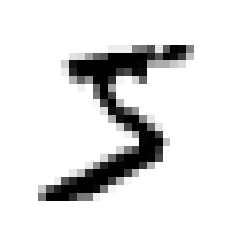

In [11]:
# Display the first image
digit = df[0]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.axis('off')
plt.show()

In [12]:
# Standardise the data
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

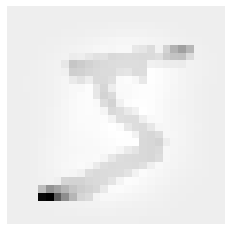

In [13]:
# Display the first image after standardisation
digit_scale = df_scale[0]
digit_scale_image = digit_scale.reshape(28, 28)
plt.imshow(digit_scale_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.axis('off')
plt.show()

## Classification without PCA

In [19]:
X_train,X_test, y_train, y_test = train_test_split(df_scale, target, random_state=22, test_size=0.25)

In [23]:
rf_model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=100)

In [24]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [25]:
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

In [26]:
accuracy_score(pred_train, y_train), accuracy_score(pred_test, y_test)

(0.7534666666666666, 0.7470857142857142)

# Classification after PCA

In [28]:
#Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep
pca = PCA().fit(X_train) 

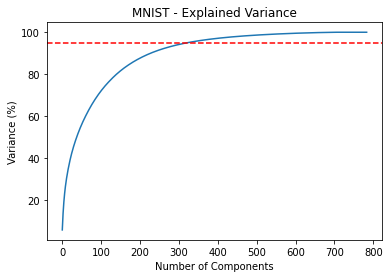

In [29]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('MNIST - Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

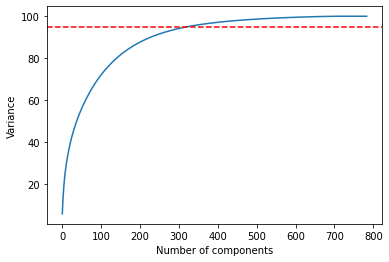

In [39]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("Number of components")
plt.ylabel("Variance")

plt.axhline(y=95, color='red', linestyle="--")

In [40]:
# selecting only 350 components
pca = PCA(350).fit(X_train)

In [42]:
# transform both training and validation data

pca_training = pca.transform(X_train)
pca_test = pca.transform(X_test)

In [41]:
rf_model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=100)

In [43]:
rf_model.fit(pca_training, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [44]:
pred_train = rf_model.predict(pca_training)
pred_test = rf_model.predict(pca_test)

In [49]:
accuracy_score(pred_train, y_train) , accuracy_score(pred_test, y_test)

(0.7819047619047619, 0.7784)

As we can see, accuracy has increased after applying PCA.